<a href="https://colab.research.google.com/github/Logann8/Tugas-7-Stokasik-dan-Simulasi-/blob/main/Salinan_dari_Pemodelan_Statistik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

data_tweet = [
    ['P', 'P', 'N', 'G'],
    ['N', 'P', 'P', 'P'],
    ['G', 'N', 'G', 'G'],
    ['P', 'N', 'N', 'P'],
    ['N', 'G', 'G', 'P']
]

sentimen_list = ['P', 'N', 'G']
index_sentimen = {sentimen: idx for idx, sentimen in enumerate(sentimen_list)}

matrix_transisi = np.zeros((len(sentimen_list), len(sentimen_list)))

for conversation in data_tweet:
    for i in range(len(conversation) - 1):
        current = conversation[i]
        next_ = conversation[i + 1]
        matrix_transisi[index_sentimen[current], index_sentimen[next_]] += 1

for row in range(len(matrix_transisi)):
    row_sum = np.sum(matrix_transisi[row])
    if row_sum > 0:
        matrix_transisi[row] /= row_sum

matrix_transisi = np.round(matrix_transisi, 2)

print("Matriks Transisi:")
for i, row in enumerate(matrix_transisi):
    print(f"{sentimen_list[i]} -> {row}")

Matriks Transisi:
P -> [0.6 0.4 0. ]
N -> [0.33 0.17 0.5 ]
G -> [0.25 0.25 0.5 ]


In [ ]:

def prediksi_tweet(matrix_transisi, sentimen_awal, jumlah_tweet):
    vektor_awal = np.zeros(len(sentimen_list))
    vektor_awal[index_sentimen[sentimen_awal]] = 1

    hasil_prediksi = []
    for _ in range(jumlah_tweet):
        vektor_awal = np.dot(vektor_awal, matrix_transisi)
        hasil_prediksi.append(np.round(vektor_awal, 2))

    return hasil_prediksi

sentimen_awal = 'P'
jumlah_tweet = 3
prediksi = prediksi_tweet(matrix_transisi, sentimen_awal, jumlah_tweet)

print("\nPrediksi Sentimen untuk Tiga Tweet Berikutnya:")
for idx, prob in enumerate(prediksi, start=1):
    print(f"Tweet ke-{idx}: {dict(zip(sentimen_list, prob))}")


Prediksi Sentimen untuk Tiga Tweet Berikutnya:
Tweet ke-1: {'P': 0.6, 'N': 0.4, 'G': 0.0}
Tweet ke-2: {'P': 0.49, 'N': 0.31, 'G': 0.2}
Tweet ke-3: {'P': 0.45, 'N': 0.3, 'G': 0.25}


In [ ]:
def analisis_perkembangan(matrix_transisi, sentimen_awal, langkah=10):

    vektor_awal = np.zeros(len(sentimen_list))
    vektor_awal[index_sentimen[sentimen_awal]] = 1

    riwayat = []
    for _ in range(langkah):
        vektor_awal = np.dot(vektor_awal, matrix_transisi)
        riwayat.append(np.round(vektor_awal, 2))  # Membulatkan ke dua angka desimal

    return riwayat

riwayat_analisis = analisis_perkembangan(matrix_transisi, sentimen_awal='P', langkah=10)

print("\nAnalisis Perkembangan Sentimen dalam 10 Langkah:")
for idx, prob in enumerate(riwayat_analisis, start=1):
    print(f"Langkah {idx}: {dict(zip(sentimen_list, prob))}")


Analisis Perkembangan Sentimen dalam 10 Langkah:
Langkah 1: {'A': 0.6, 'B': 0.2, 'C': 0.2}
Langkah 2: {'A': 0.41, 'B': 0.27, 'C': 0.32}
Langkah 3: {'A': 0.32, 'B': 0.29, 'C': 0.39}
Langkah 4: {'A': 0.28, 'B': 0.28, 'C': 0.44}
Langkah 5: {'A': 0.26, 'B': 0.28, 'C': 0.46}
Langkah 6: {'A': 0.25, 'B': 0.27, 'C': 0.48}
Langkah 7: {'A': 0.25, 'B': 0.26, 'C': 0.49}
Langkah 8: {'A': 0.25, 'B': 0.26, 'C': 0.49}
Langkah 9: {'A': 0.25, 'B': 0.26, 'C': 0.49}
Langkah 10: {'A': 0.25, 'B': 0.25, 'C': 0.5}


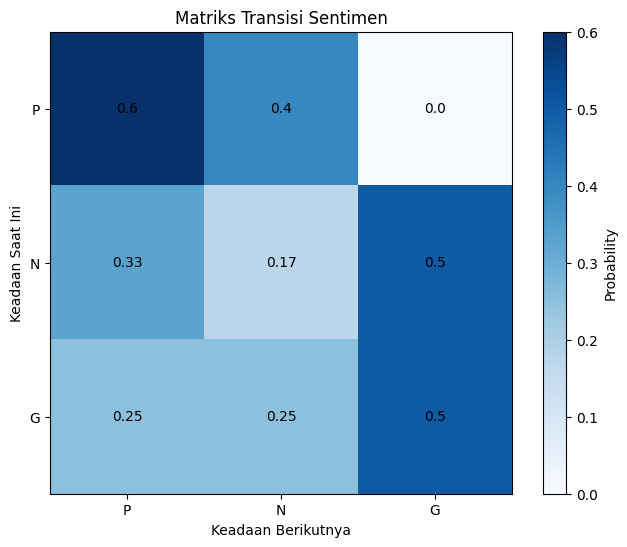

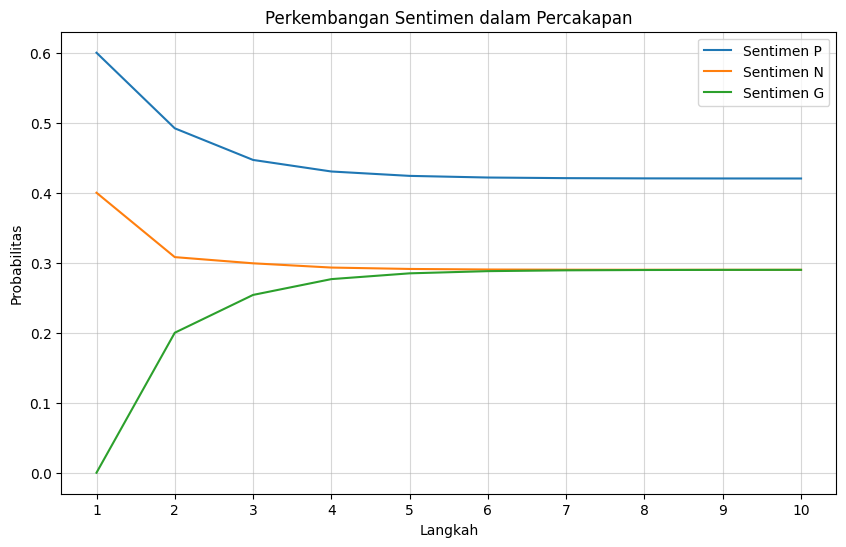

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data_tweet = [
    ['P', 'P', 'N', 'G'],
    ['N', 'P', 'P', 'P'],
    ['G', 'N', 'G', 'G'],
    ['P', 'N', 'N', 'P'],
    ['N', 'G', 'G', 'P']
]

sentimen_list = ['P', 'N', 'G']
index_sentimen = {sentimen: idx for idx, sentimen in enumerate(sentimen_list)}

matrix_transisi = np.zeros((len(sentimen_list), len(sentimen_list)))

for conversation in data_tweet:
    for i in range(len(conversation) - 1):
        current = conversation[i]
        next_ = conversation[i + 1]
        matrix_transisi[index_sentimen[current], index_sentimen[next_]] += 1

for row in range(len(matrix_transisi)):
    row_sum = np.sum(matrix_transisi[row])
    if row_sum > 0:
        matrix_transisi[row] /= row_sum

matrix_transisi = np.round(matrix_transisi, 2)

plt.figure(figsize=(8, 6))
plt.imshow(matrix_transisi, cmap="Blues", interpolation="nearest")
plt.colorbar(label="Probability")
plt.xticks(range(len(sentimen_list)), sentimen_list)
plt.yticks(range(len(sentimen_list)), sentimen_list)
plt.title("Matriks Transisi Sentimen")
plt.xlabel("Keadaan Berikutnya")
plt.ylabel("Keadaan Saat Ini")
for i in range(len(sentimen_list)):
    for j in range(len(sentimen_list)):
        plt.text(j, i, matrix_transisi[i, j], ha="center", va="center", color="black")
plt.show()

def analisis_perkembangan(matrix_transisi, sentimen_awal, langkah=10):
    vektor_awal = np.zeros(len(sentimen_list))
    vektor_awal[index_sentimen[sentimen_awal]] = 1

    riwayat = []
    for _ in range(langkah):
        vektor_awal = np.dot(vektor_awal, matrix_transisi)
        riwayat.append(vektor_awal)

    return np.array(riwayat)

sentimen_awal = 'P'
langkah = 10
riwayat = analisis_perkembangan(matrix_transisi, sentimen_awal, langkah)

plt.figure(figsize=(10, 6))
for i, sentimen in enumerate(sentimen_list):
    plt.plot(range(1, langkah + 1), riwayat[:, i], label=f"Sentimen {sentimen}")

plt.title("Perkembangan Sentimen dalam Percakapan")
plt.xlabel("Langkah")
plt.ylabel("Probabilitas")
plt.xticks(range(1, langkah + 1))
plt.legend()
plt.grid(alpha=0.5)
plt.show()